In [59]:
#Ricardo Figueroa CU 112714
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from scipy.stats import norm
from sklearn import preprocessing, linear_model
from random import random
import requests
import csv
from sklearn.naive_bayes import MultinomialNB

In [60]:
#se leen datos del repositorio
CSV_URL = 'https://raw.githubusercontent.com/ClaseML-2017/MaterialyTareas/master/datos/regLin.csv'
with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)

In [61]:
#se incluyen los datos en data frame y se transforman en float
x = np.array([row[0] for row in my_list])
y = np.array([row[1] for row in my_list])
d = {'x' : x[1:], 'y' : y[1:]}
df = pd.DataFrame(d)
df = df.astype(float)

In [62]:
index=np.array([1 if random() < 0.75 else 0 for i in range(len(df))])

In [63]:
#se incluyen las variables en arreglos independientes, es necesario un reshape para que los datos puedan ser leidos por el fit
X_train=np.array(df[df.columns[0]])[index==1]
X_test=np.array(df[df.columns[0]])[index==0]
Y_train=np.array(df[df.columns[1]])[index==1]
Y_test=np.array(df[df.columns[1]])[index==0]
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)
X_test2 = X_test
Y_train2 = Y_train
X_train2=X_train
Y_test2 = Y_test

In [64]:
#se declara la regresion, se ajustan los datos al modelo y se hacen predicciones
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_predict = regr.predict(X_test)

In [65]:
#Coeficientes
# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
intercept = regr.intercept_
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_predict, multioutput='raw_values'))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_predict))

('Coefficients: \n', array([[ 0.60440697]]), array([ 2.73361436]))
Mean squared error: 18.55
Variance score: 0.94


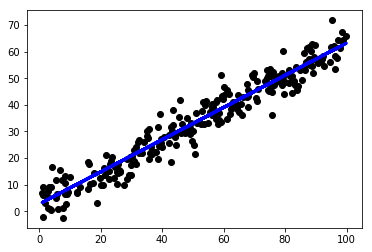

In [66]:
#graficas de modelo de regresion
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_predict, color='blue', linewidth=3)
plt.show()

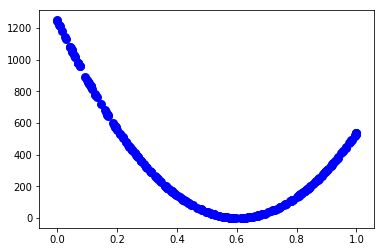

In [67]:
#graficas de error vs. coeficiente
error_array = []
b_array = []
for i in range(len(X_test2)):
    b = rd.uniform(0,1)
    y = b*X_test2 + intercept
    error_array.append(mean_squared_error(y, Y_predict, multioutput='raw_values'))
    b_array.append(b)
plt.scatter(b_array, error_array, color='blue', linewidth=3)
plt.show()

In [162]:
# algoritmo para ajustar coeficientes
def ajustarCoef(x,y,aprend):
    w0List=list()
    w1List=list()
    w0 = 1
    w1 = 1
    Error = 0.0
    YTemp = 0.0
    ErrorList=list()
    
    if (len(x) == len(y)):
        for i in range(0,len(x)):
            YTemp = y[i]-(w1*x[i])-w0
            w0Gradient = -YTemp/len(x)*1
            w1Gradient = -x[i]*YTemp/len(x)*1
            ErrorList.append(YTemp)
            w1 = w1-(aprend*w1Gradient)
            w0 = w0-(aprend*w0Gradient)
            w0List.append(w0)
            w1List.append(w1)
            
        W0 = np.array([row for row in w0List])
        W1 = np.array([row for row in w1List])
    
    return W0,W1,ErrorList

In [173]:
def graficar(learningRate):
    W0 = ajustarCoef(X_train2, Y_train2, learningRate)[0][-1]
    W1 = ajustarCoef(X_train2, Y_train2, learningRate)[1][-1]
    W1List = ajustarCoef(X_train2, Y_train2, learningRate)[1]
    W0List = ajustarCoef(X_train2, Y_train2, learningRate)[0]
    
    Error = ajustarCoef(X_train2, Y_train2, learningRate)[2]
    
    Y_test3 = X_test2*W1+W0
    
    plt.plot(X_test2, Y_test3, color='red', linewidth=3)
    plt.scatter(X_test2, Y_test2, color='blue', linewidth=3)
    plt.show()
    
    plt.scatter(W1List, Error)
    plt.show()
    
    plt.scatter(W0List, Error)
    plt.show()
    
    print W0
    print W1

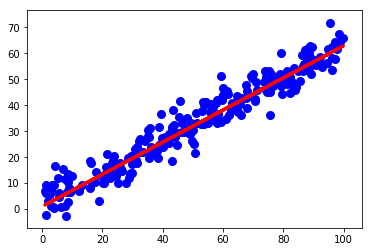

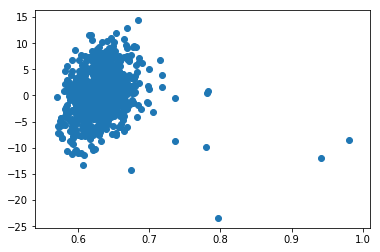

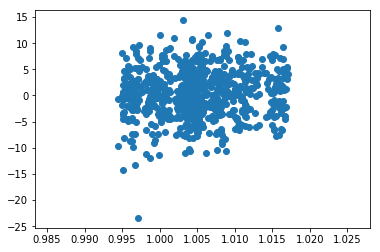

[ 1.01694872]
[ 0.61836583]


In [174]:
graficar(0.05)

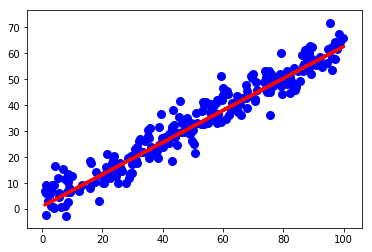

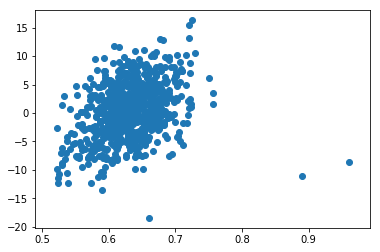

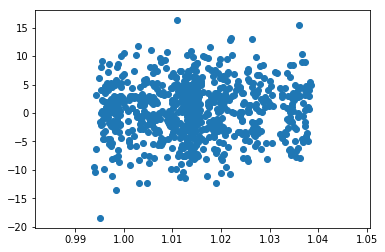

[ 1.03832936]
[ 0.61557989]


In [175]:
graficar(0.1)

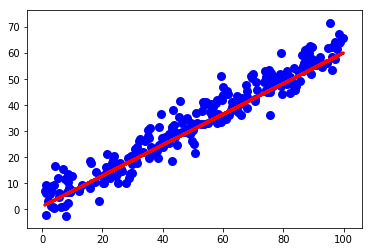

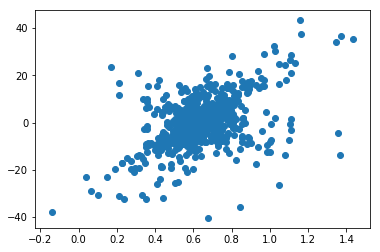

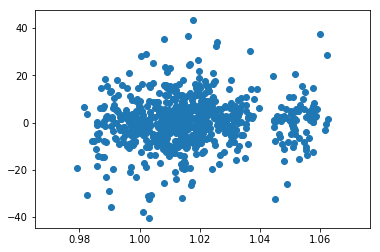

[ 1.057721]
[ 0.59059184]


In [176]:
graficar(0.25)